# BIG MART SALES PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Big_Mart_Sales_Dataset.csv')

In [4]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [5]:
data.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1070           NCY05        13.50          Low Fat         0.055102   
3114           FDH08          NaN          Low Fat         0.030516   
8501           FDW21         5.34          Regular         0.005998   
5506           FDV59        13.35               LF         0.000000   
3193           FDP11        15.85          Low Fat         0.069491   

                  Item_Type  Item_MRP Outlet_Identifier  \
1070     Health and Hygiene   37.0874            OUT045   
3114  Fruits and Vegetables  227.8010            OUT019   
8501            Snack Foods  100.4358            OUT017   
5506                 Breads  217.6166            OUT018   
3193                 Breads  218.2166            OUT017   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1070                       2002         NaN               Tier 2   
3114                       1985       Small               Tier 1   
8501                       2007         NaN               Tier 2   
5506                       2009      Medium               Tier 3   
3193                       2007         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
1070  Supermarket Type1           952.7598  
3114      Grocery Store           459.4020  
8501  Supermarket Type1          1508.0370  
5506  Supermarket Type2          3265.7490  
3193  Supermarket Type1          4789.7652

### Find shape of our dataset(Number of rows and columns)

In [6]:
data.shape

(8523, 12)

### Get information about our dataset, like total number of rows, columns, datatypes of each columns etc.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### check null values in the dataset

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.isnull().sum()*100 / len(data)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

##### as the percentage of missing data is more then 5% we cannot drop the columns as it would lead to loss of data and result in improper prediction of sales.

### Taking care of Duplicate values

In [11]:
data.duplicated().any()

False

##### there are no missing values(rows) in dataset

### Handle missing values

#### There are two approach a) univariate imputation   i) mean   ii) median   iii)  mode iv) constant value  v) interpolation                                                                             b) bivariate imputation                                     i) regression imputaion  ii) k-nearest neighbors   iii) machine learning  

##### a)univariate imputation

#####         i) mean and ii) median

In [12]:
mean = data.Item_Weight.mean()
median = data.Item_Weight.median()
print(mean,median)

12.857645184135976 12.6


In [13]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean)
data['Item_Weight_median']=data['Item_Weight'].fillna(median)


In [14]:
data.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_mean  Item_Weight_median  
0               9.3                 9.3

In [15]:
print("original weight variable variance",data['Item_Weight'].var())

original weight variable variance 21.56168825983637


In [16]:
print("weight variable variance after mean imputation",data['Item_Weight_mean'].var())
print("weight variable variance after median imputaion",data['Item_Weight_median'].var())

weight variable variance after mean imputation 17.860121735060453
weight variable variance after median imputaion 17.869561454073366


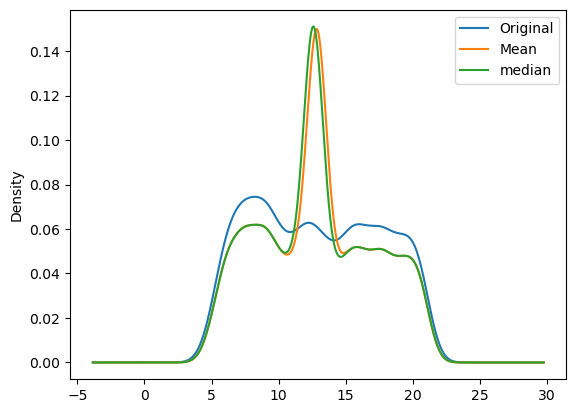

In [17]:
data['Item_Weight'].plot(kind = 'kde',label='Original')

data['Item_Weight_mean'].plot(kind='kde',label='Mean')

data['Item_Weight_median'].plot(kind = 'kde', label='median')

plt.legend()
plt.show()

<Axes: >

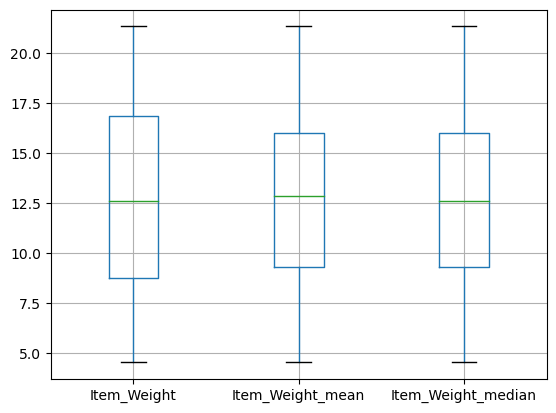

In [18]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

##### from above two we can clearly see that spreadness of data due to filling missing values have been decreased which is not desirable.

#####  filling by interpolation

In [19]:
data['Item_Weight_interpolate']= data.Item_Weight.interpolate(method='linear')

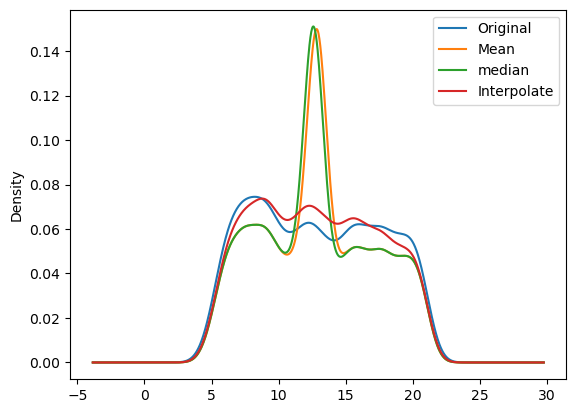

In [20]:
data['Item_Weight'].plot(kind = 'kde',label='Original')

data['Item_Weight_mean'].plot(kind='kde',label='Mean')

data['Item_Weight_median'].plot(kind = 'kde', label='median')

data['Item_Weight_interpolate'].plot(kind = 'kde',label='Interpolate')

plt.legend()
plt.show()

##### b) multivariate imputation

In [21]:
from sklearn.impute import KNNImputer

In [22]:
knn = KNNImputer(n_neighbors=10,weights='distance')

In [23]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

#####  knn imputer is a method of filling missing data in a dataset. it works by identifing k nearest data points with available values for missing values and then compute the average of those values to fill missing values. This is based on principle that similar datapoints have similar values.

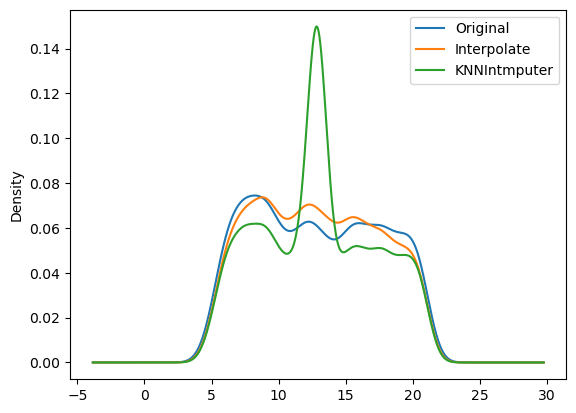

In [24]:
data['Item_Weight'].plot(kind = 'kde',label='Original')

data['Item_Weight_interpolate'].plot(kind = 'kde',label='Interpolate')

data['knn_imputer'].plot(kind='kde',label='KNNIntmputer')

plt.legend()
plt.show()

##### from all above methods to fill data we can clearly see that interpolation method is the best way to fill the missing values in item_weight column.

In [25]:
data=data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [26]:
data.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15          Low Fat         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interpolate  
0                      9.3

In [27]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

#### Filling outlet_size

##### as it is not numerical we do it by modal imputation

In [28]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

##### lets calculate the most frequently occuring outlet size in eacy type of outlet.

In [30]:
mode_outlet=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [31]:
mode_outlet

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [32]:
missing_values=data['Outlet_Size'].isnull()

In [33]:
data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [34]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

#### Item_Fat_Content

In [35]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [36]:
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [37]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [38]:
data.Item_Fat_Content.value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Item_Visibility

In [39]:
data.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [40]:
data['Item_Visibility_interpolate']=data.Item_Visibility.replace(0,np.nan).interpolate(method='linear')

In [41]:
data=data.drop('Item_Visibility',axis=1)

In [42]:
data.Item_Visibility_interpolate.value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

#### Item_Type

In [43]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#### Item_Identifier

In [44]:
data.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
data.Item_Identifier = data.Item_Identifier.apply(lambda x: x[:2])

In [46]:
data.Item_Identifier.value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

#####  as the indentifier had first two letter common we categories it like this: FD mean food, NC means Non-Consumable and DR means drinks.

#### Outlet_Establishment_Year

In [47]:
data.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

##### we would rather find the age of the super mart rather then keeping a column of its establishment

In [48]:
import datetime as dt

In [49]:
current_year = dt.datetime.today().year

In [50]:
current_year

2024

In [51]:
data['Outlet_Age']=current_year- data.Outlet_Establishment_Year

In [52]:
data.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0              FD               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interpolate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  Outlet_Age  
0                     0.016047          25

In [53]:
data = data.drop('Outlet_Establishment_Year',axis=1)

#### Handling categorical columns

##### ml algos only understand numerical data so we need to handle the categorical data.

##### covert categorical into numerical

##### ordinal encoding to convert it

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
data_encoded = data.copy()

In [56]:
cat_cols = data.select_dtypes(include=['object']).columns

In [57]:
for col in cat_cols:
    oe=OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [58]:
data_encoded.head(3)

Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Identifier  \
0              1.0               0.0        4.0  249.8092                9.0   
1              0.0               1.0       14.0   48.2692                3.0   
2              1.0               0.0       10.0  141.6180                9.0   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0          1.0                   0.0          1.0          3735.1380   
1          1.0                   2.0          2.0           443.4228   
2          1.0                   0.0          1.0          2097.2700   

   Item_Weight_interpolate  Item_Visibility_interpolate  Outlet_Age  
0                     9.30                     0.016047          25  
1                     5.92                     0.019278          15  
2                    17.50                     0.016760          25

In [59]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)

In [60]:
y= data_encoded['Item_Outlet_Sales']

In [61]:
data

Item_Identifier Item_Fat_Content              Item_Type  Item_MRP  \
0                 FD               LF                  Dairy  249.8092   
1                 DR          Regular            Soft Drinks   48.2692   
2                 FD               LF                   Meat  141.6180   
3                 FD          Regular  Fruits and Vegetables  182.0950   
4                 NC               LF              Household   53.8614   
...              ...              ...                    ...       ...   
8518              FD               LF            Snack Foods  214.5218   
8519              FD          Regular           Baking Goods  108.1570   
8520              NC               LF     Health and Hygiene   85.1224   
8521              FD          Regular            Snack Foods  103.1332   
8522              DR               LF            Soft Drinks   75.4670   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0               OUT049      Medium               Tier 1  Supermarket Type1   
1               OUT018      Medium               Tier 3  Supermarket Type2   
2               OUT049      Medium               Tier 1  Supermarket Type1   
3               OUT010       Small               Tier 3      Grocery Store   
4               OUT013        High               Tier 3  Supermarket Type1   
...                ...         ...                  ...                ...   
8518            OUT013        High               Tier 3  Supermarket Type1   
8519            OUT045       Small               Tier 2  Supermarket Type1   
8520            OUT035       Small               Tier 2  Supermarket Type1   
8521            OUT018      Medium               Tier 3  Supermarket Type2   
8522            OUT046       Small               Tier 1  Supermarket Type1   

      Item_Outlet_Sales  Item_Weight_interpolate  Item_Visibility_interpolate  \
0             3735.1380                    9.300                     0.016047   
1              443.4228                    5.920                     0.019278   
2             2097.2700                   17.500                     0.016760   
3              732.3800                   19.200                     0.015755   
4              994.7052                    8.930                     0.014751   
...                 ...                      ...                          ...   
8518          2778.3834                    6.865                     0.056783   
8519           549.2850                    8.380                     0.046982   
8520          1193.1136                   10.600                     0.035186   
8521          1845.5976                    7.210                     0.145221   
8522           765.6700                   14.800                     0.044878   

      Outlet_Age  
0             25  
1             15  
2             25  
3             26  
4             37  
...          ...  
8518          37  
8519          22  
8520          20  
8521          15  
8522          27  

[8523 rows x 12 columns]

In [62]:
X

Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  \
0                 1.0               0.0        4.0  249.8092   
1                 0.0               1.0       14.0   48.2692   
2                 1.0               0.0       10.0  141.6180   
3                 1.0               1.0        6.0  182.0950   
4                 2.0               0.0        9.0   53.8614   
...               ...               ...        ...       ...   
8518              1.0               0.0       13.0  214.5218   
8519              1.0               1.0        0.0  108.1570   
8520              2.0               0.0        8.0   85.1224   
8521              1.0               1.0       13.0  103.1332   
8522              0.0               0.0       14.0   75.4670   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                   9.0          1.0                   0.0          1.0   
1                   3.0          1.0                   2.0          2.0   
2                   9.0          1.0                   0.0          1.0   
3                   0.0          2.0                   2.0          0.0   
4                   1.0          0.0                   2.0          1.0   
...                 ...          ...                   ...          ...   
8518                1.0          0.0                   2.0          1.0   
8519                7.0          2.0                   1.0          1.0   
8520                6.0          2.0                   1.0          1.0   
8521                3.0          1.0                   2.0          2.0   
8522                8.0          2.0                   0.0          1.0   

      Item_Weight_interpolate  Item_Visibility_interpolate  Outlet_Age  
0                       9.300                     0.016047          25  
1                       5.920                     0.019278          15  
2                      17.500                     0.016760          25  
3                      19.200                     0.015755          26  
4                       8.930                     0.014751          37  
...                       ...                          ...         ...  
8518                    6.865                     0.056783          37  
8519                    8.380                     0.046982          22  
8520                   10.600                     0.035186          20  
8521                    7.210                     0.145221          15  
8522                   14.800                     0.044878          27  

[8523 rows x 11 columns]

In [63]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

#### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


#### XGBRFRegression (xtreme gradient boosting random forest)

In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [68]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


#### XGBRFRegressor Features importance

In [69]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance',ascending=False)

feature  XGBRF_importance
7                   Outlet_Type          0.349864
5                   Outlet_Size          0.192658
10                   Outlet_Age          0.175040
3                      Item_MRP          0.131012
4             Outlet_Identifier          0.130735
6          Outlet_Location_Type          0.013184
9   Item_Visibility_interpolate          0.002493
8       Item_Weight_interpolate          0.001770
2                     Item_Type          0.001566
0               Item_Identifier          0.000999
1              Item_Fat_Content          0.000680

##### hence we would like to consider only the top 5 features

In [70]:
['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_interpolate',
 'Item_Type','Item_Fat_Content','Item_Identifier']

['Outlet_Location_Type',
 'Item_Visibility_interpolate',
 'Item_Weight_interpolate',
 'Item_Type',
 'Item_Fat_Content',
 'Item_Identifier']

In [71]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_interpolate',
 'Item_Type','Item_Fat_Content','Item_Identifier'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [72]:
final_data=X.drop(['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_interpolate',
 'Item_Type','Item_Fat_Content','Item_Identifier'],axis=1)

In [73]:
final_data

Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Type  Outlet_Age
0     249.8092                9.0          1.0          1.0          25
1      48.2692                3.0          1.0          2.0          15
2     141.6180                9.0          1.0          1.0          25
3     182.0950                0.0          2.0          0.0          26
4      53.8614                1.0          0.0          1.0          37
...        ...                ...          ...          ...         ...
8518  214.5218                1.0          0.0          1.0          37
8519  108.1570                7.0          2.0          1.0          22
8520   85.1224                6.0          2.0          1.0          20
8521  103.1332                3.0          1.0          2.0          15
8522   75.4670                8.0          2.0          1.0          27

[8523 rows x 5 columns]

#### Best model

In [74]:
from xgboost import XGBRFRegressor

In [75]:
xg_final = XGBRFRegressor()

In [76]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [78]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,test_size=0.20,random_state=42)

In [79]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [80]:
y_pred= xg_final.predict(X_test)

In [81]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

##### on average the difference between predicted values and actual value is 713.9516

#### prediction of unseen data

In [82]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))
pred

array([2067.0864], dtype=float32)

In [83]:
print(f"sales values is between{pred-713.95} and {pred+713.95}")

sales values is between[1353.1365] and [2781.0364]


#### Save the model using joblib 

In [84]:
import joblib

In [85]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [86]:
model = joblib.load('bigmart_model')

In [87]:
predict=model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))
predict

array([2067.0864], dtype=float32)

In [88]:
print(f"sales values is between{predict-713.95} and {predict+713.95}")

sales values is between[1353.1365] and [2781.0364]


# GUI

In [89]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

9
1
1
25
Sales amount [1620.7812]
9
1
1
25
Sales amount [4068.1313]
3
1
2
15
Sales amount [733.74054]
9
1
1
25
Sales amount [2067.0864]
